## Import

In [4]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys


from sklearn.preprocessing import StandardScaler

## Be sure to used Tensorflow 2.0

In [5]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [7]:
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

# flatten
images = images.reshape(-1, 784)
images = images.astype(float)

scaler = StandardScaler()

images = scaler.fit_transform(images)

print(images.mean())
print(images.std())

-1.0476880134421886e-18
1.0000000000000007


## Plot one of the data

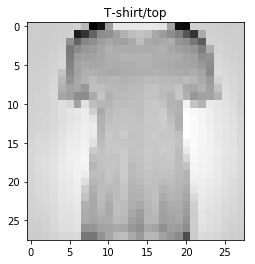

In [8]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(images[10].reshape(28, 28), cmap="binary")
#plt.title(targets_names[targets[10]])
plt.title(targets_names[targets[10]])
plt.show()

In [9]:
#print("First line of one image", images[11][0])
print("First line of one image", images[11])
print("Associated target", targets[11])

First line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

# Create the model
![](images/simple_nn.png)

# Add the layers

In [10]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.05521132 0.49481636 0.03139508 0.05542628 0.0551687  0.08608311
  0.01741511 0.1200914  0.07588126 0.00851135]] [9]


## Model Summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [12]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [13]:
history = model.fit(images, targets, epochs=10)

Epoch 1/10
10000/10000 [==============================] - 1s 58us/sample - loss: 1.6210 - accuracy: 0.4803
Epoch 2/10
10000/10000 [==============================] - 1s 58us/sample - loss: 1.0098 - accuracy: 0.6912
Epoch 3/10
10000/10000 [==============================] - 1s 54us/sample - loss: 0.8317 - accuracy: 0.7369
Epoch 4/10
10000/10000 [==============================] - 1s 53us/sample - loss: 0.7409 - accuracy: 0.7574
Epoch 5/10
10000/10000 [==============================] - 1s 51us/sample - loss: 0.6832 - accuracy: 0.7711
Epoch 6/10
10000/10000 [==============================] - 1s 54us/sample - loss: 0.6415 - accuracy: 0.7820
Epoch 7/10
10000/10000 [==============================] - 1s 53us/sample - loss: 0.6088 - accuracy: 0.7924
Epoch 8/10
10000/10000 [==============================] - 1s 51us/sample - loss: 0.5828 - accuracy: 0.7994
Epoch 9/10
10000/10000 [==============================] - 1s 51us/sample - loss: 0.5606 - accuracy: 0.8053
Epoch 10/10
10000/10000 [============

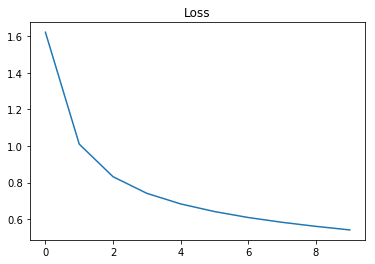

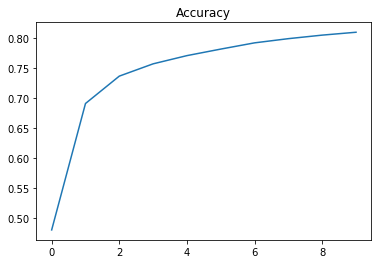

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()